## **Escenario**
El centro de llamadas de una pequeña empresa está recibiendo más llamadas debido al reciente aumento de su popularidad. Si la demanda sigue aumentando, la empresa tendrá que contratar a más agentes. Antes de explorar esta opción, quieren saber si hay alguna forma de que el centro de llamadas pueda operar de manera más eficiente.

Como suele ocurrir en empresas pequeñas y en crecimiento, los analistas de datos a menudo asumen una amplia gama de proyectos. Así que ¡sorpresa! Los managers te han pedido que analices los datos de un sistema simple de seguimiento de llamadas instalado en el centro de llamadas.

El sistema rastrea el ``agente (agent_id)``, el ``motivo de la llamada (call_type_id)`` y la ``duración total (en minutos) de la llamada (call_time)``. Esta información se recopila para el mes pasado y se almacena en el archivo agent_call_times.csv. Se puede encontrar un diccionario para la columna call_type_id en el archivo call_type_dictionary.csv.

Tus objetivos son:
1. Determinar los tipos de llamadas más comunes que recibe el centro de llamadas.
2. Determinar si algún tipo de llamada tarda significativamente más que otro.
3. Explorar la variación del tiempo de llamada entre los agentes.
4. Resumir tus hallazgos y enviar recomendaciones a los managers.

## **Vamos con el análisis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
calls_data = pd.read_csv('agent_call_times.csv')
calls_dict = pd.read_csv('call_type_dictionary.csv')
print(calls_data.head(10))
print('')
print(calls_dict)

   agent_id  call_type_id  call_time
0      1001             1       3.96
1      1001             1      14.81
2      1001             1       4.78
3      1001             1       4.11
4      1001             1       7.11
5      1001             1       7.21
6      1001             1       4.72
7      1001             1       6.60
8      1001             1       4.84
9      1001             1       4.99

    call_type_id      call_type_name
0              1             Returns
1              2            Shipping
2              3     Account General
3              4        Info Request
4              5       Cancellations
5              6       Website Help 
6              7        Order Status
7              8      Product Issues
8              9               Other
9             10  Discount Exception
10            11     General Comment
11            12      Charge Dispute
12            13     Damaged Product


In [ ]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24551 entries, 0 to 24550
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   agent_id      24551 non-null  int64  
 1   call_type_id  24551 non-null  int64  
 2   call_time     24551 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 575.5 KB


Cada fila en ``calls_data`` representa una llamada y hay 13 tipos de llamadas en el diccionario.

Empezaremos respondiendo unas preguntas básicas sobre el dataset.
1. ¿Cuántas llamadas hay?
2. ¿Cuántos agentes se mencionan en los datos?
3. ¿Todos los tipos de llamadas del diccionario están presentes en el dataset? ¿Hay algún tipo de llamada en el dataset que no figure en el diccionario?
4. ¿Cuál es el tiempo medio total de llamadas?
5. ¿Cómo se distribuyen las llamadas entre los agentes?

Llamadas totales: 24551
Agentes totales: 30
Único call_type_ids en data: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
El tiempo medio general es 9.640920125453137


<AxesSubplot: >

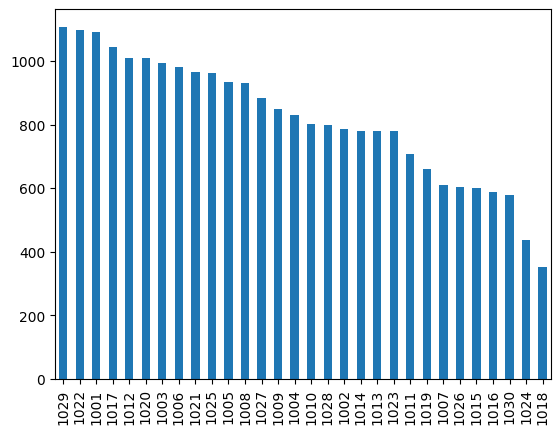

In [ ]:
# mostramos el número de llamadas
print('Llamadas totales:', len(calls_data)) # teclea el código

# mostramos el número de agentes únicos
print('Agentes totales:', calls_data.agent_id.nunique()) # nunique para contar los agentes únicos

# mostramos la lista de call_type_id únicos en calls_data
print('Único call_type_ids en data:', calls_data.call_type_id.unique()) # teclea el código

# mostramos el tiempo medio de llamada
print('El tiempo medio general es', calls_data.call_time.mean()) # teclea el código

# visualizamos la distribución del número de llamadas por agente (un gráfico de barras)
calls_data['agent_id'].value_counts().plot(kind='bar')

Observamos que hay 30 agentes, un total de 24.551 llamadas y un tiempo medio de llamada de 9,64 minutos entre todas las llamadas y agentes. El agente 1018 tiene la menor cantidad de llamadas, alrededor 400, mientras que el agente 1029 tiene la mayor cantidad de llamadas con alrededor de 1100. Todos los tipos de llamadas del diccionario están en el dataset y no hay tipos de llamadas desconocidas.

Para aborda el objetivo número 1 vamos a visualizar la proporción de tipos de llamadas en todas las llamadas. Para ello haremos lo suguiente:
1. Fusionaremos los datos de ``calls_data`` con los datos de ``calls_dict`` para obtener la columna ``'call_type_name'``.
2. Haremos el recuento de los valores de esta columna y guardaremos los recuentos en la variable ``'counts_by_call_type'``.
3. Por último, crearemos un gráfico circular para visualizar la proporción de tipos de llamadas.

In [ ]:
# fusionamos calls_data con calls_dict para obtener call_type_name
calls_data = calls_data.merge(calls_dict, on='call_type_id')
calls_data.head()

,agent_id,call_type_id,call_time,call_type_name
0,1001,1,3.96,Returns
1,1001,1,14.81,Returns
2,1001,1,4.78,Returns
3,1001,1,4.11,Returns
4,1001,1,7.11,Returns


In [ ]:
# Hacemos en recuento de valores de call_type_name
counts_by_call_type = calls_data.call_type_name.value_counts()
counts_by_call_type

Website Help          4718
Info Request          3728
Account General       3230
Order Status          3196
Cancellations         3024
Returns               2706
Shipping              2196
Other                  365
Damaged Product        324
Charge Dispute         275
General Comment        269
Product Issues         260
Discount Exception     260
Name: call_type_name, dtype: int64

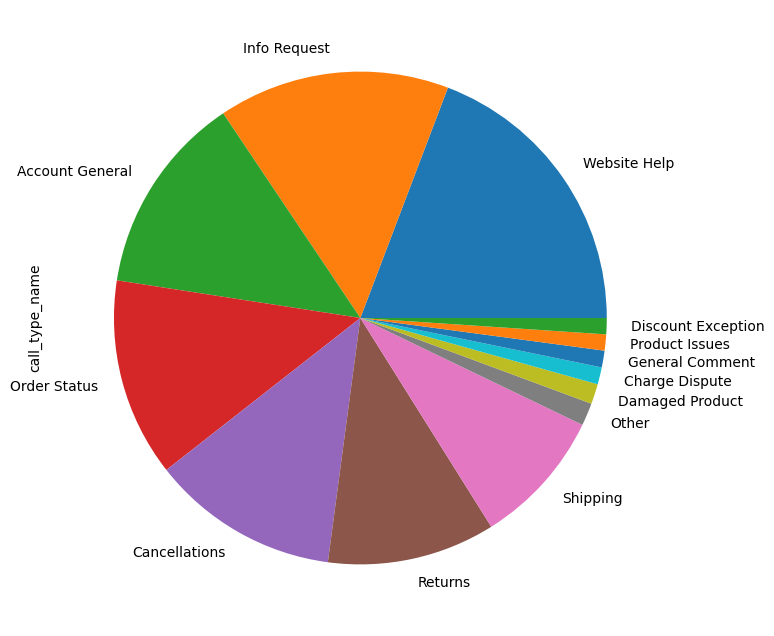

In [ ]:
# creamos un gráfico circular
counts_by_call_type.plot(kind='pie', figsize=(8,8))
plt.show()

En este gráfico circular, vemos que aproximadamente la mitad de las categorías reciben una gran cantidad de llamadas mientras que la otra mitad recibe una cantidad muy pequeña.

Los gráficos circulares se vuelven menos útiles a medida que las proporciones de las categorías se vuelven más similares. Mientras que el gráfico circular sí muestra que más clientes llaman por la ayuda con el sitio web que por los envíos, es difícil decir, por ejemplo, si entran más llamadas para ayuda general con la cuenta o con el estado del pedido. Para tener una mejor idea de la diferencia real en los tipos de llamadas, es mejor usar un gráfico de barras.

Crearemos un gráfico de barras de los mismos datos.

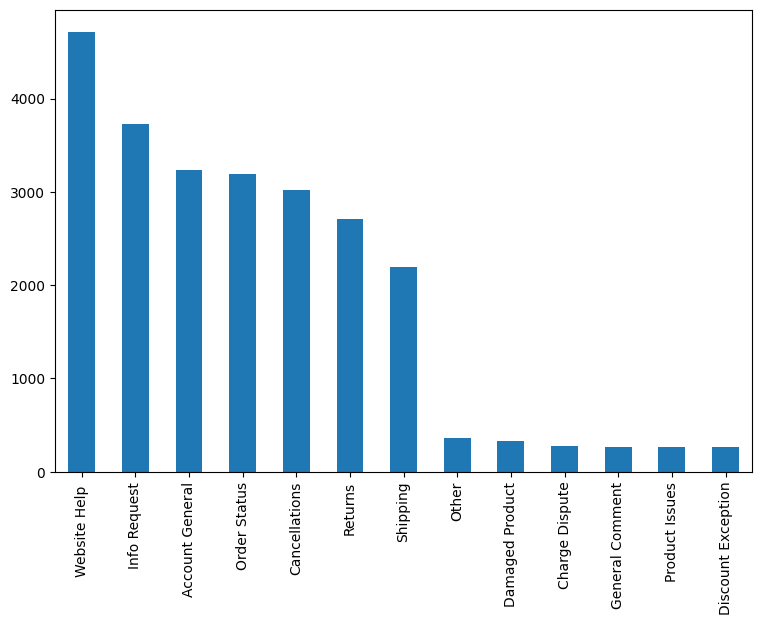

In [ ]:
counts_by_call_type.plot(kind='bar', figsize=(9,6))
plt.show()

Mientras los gráficos circulares pueden ser útiles, los gráficos de barras tienen ventajas obvias. Tal como se observa en el gráfico, se puede notar con más facilidad las diferencias entre el tipo de llamadas y por ende los tipos de llamadas más comunes que recibe el call center.

El objetivo es encontrar formas de mejorar la eficiencia del centro de llamadas por lo que debemos centrarnos en los tipos de llamadas más frecuentes ya que **una pequeña mejora en los tiempos de llamada de los tipos de llamadas más frecuentes es más importante que una gran mejora en los tipos de llamadas menos frecuentes.**

En ese sentido combinaremos los tipos de llamadas menos frecuentes con la categoría Other.

In [ ]:
# calculamos la proporción de llamadas por tipo de llamada
proportion_by_call_type = calls_data.call_type_name.value_counts()/calls_data.call_type_name.value_counts().sum()
proportion_by_call_type

Website Help          0.192171
Info Request          0.151847
Account General       0.131563
Order Status          0.130178
Cancellations         0.123172
Returns               0.110220
Shipping              0.089446
Other                 0.014867
Damaged Product       0.013197
Charge Dispute        0.011201
General Comment       0.010957
Product Issues        0.010590
Discount Exception    0.010590
Name: call_type_name, dtype: float64

In [ ]:
# guardamos la lista de tipos de llamadas con proporciones > 0.05
main_types = proportion_by_call_type[proportion_by_call_type > 0.05].index #usamos index para sacar solamente el nombre de los tipos de llamadas
print(main_types)

Index(['Website Help ', 'Info Request', 'Account General', 'Order Status',
       'Cancellations', 'Returns', 'Shipping'],
      dtype='object')


Ahora podemos utilizar ``main_types`` para cambiar la categoría del tipo de llamada de las llamadas de baja frecuencia a ``'Other'``.

Para ello actualizaremos la columna ``call_type_name`` en ``calls_data`` cambiando los tipos de llamadas que no se encuentran en ``main_types`` a ``'Other'`` y volveremos a crear el gráfico circular para ver los cambios.

In [ ]:
#recordamos que datos tiene la tabla
calls_data.head()

,agent_id,call_type_id,call_time,call_type_name
0,1001,1,3.96,Returns
1,1001,1,14.81,Returns
2,1001,1,4.78,Returns
3,1001,1,4.11,Returns
4,1001,1,7.11,Returns


In [ ]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24551 entries, 0 to 24550
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   agent_id        24551 non-null  int64  
 1   call_type_id    24551 non-null  int64  
 2   call_time       24551 non-null  float64
 3   call_type_name  24551 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 959.0+ KB


In [ ]:
# cambiamos los tipos de llamada que no están en main_types por Other
calls_data['call_type_name'] = calls_data['call_type_name'].where(calls_data['call_type_name'].isin(main_types), 'Other')
calls_data.head()

,agent_id,call_type_id,call_time,call_type_name
0,1001,1,3.96,Returns
1,1001,1,14.81,Returns
2,1001,1,4.78,Returns
3,1001,1,4.11,Returns
4,1001,1,7.11,Returns


---
NOTA: CUANDO SE LLAMA A WHERE(), ES IMPORTANTE ESPECIFICAR LA COLUMNA A LA QUE SE APLICARÁ EL MÉTODO. POR EJEMPLO SI LA SENTENCIA HUBIESE SIDO:
  * ``calls_data = calls_data.where(calls_data['call_type_name'].isin(main_types), 'Other')``

EL FILTRADO HUBIESE FUNCIONADO PERO TODAS LAS COLUMNAS SU HUBIESEN CONVERTIDO A TIPO OBJECT CUANDO EN REALIDAD ``agent_id, call_type_id y call_time`` SON DE TIPO NUMERICO

---

<AxesSubplot: ylabel='call_type_name'>

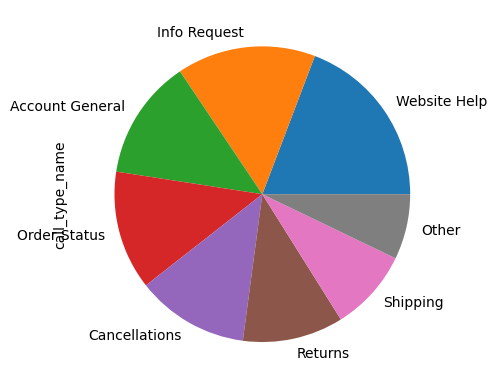

In [ ]:
# creamos nuevamente el gráfico circular 
calls_data.call_type_name.value_counts().plot(kind='pie')

Listo, hemos encontrado los principales tipos de llamadas que nos interesan y hemos combinado los tipos de llamada menos frecuentes/importantes con la categoría ``'Other'``. 

Ahora vamos a comparar la distribución de los tiempos de llamada por tipo de llamada principal.

Crearemos diagramas de caja paralelos para examinar la distribución de ``call_time`` por ``call_type_name``. 

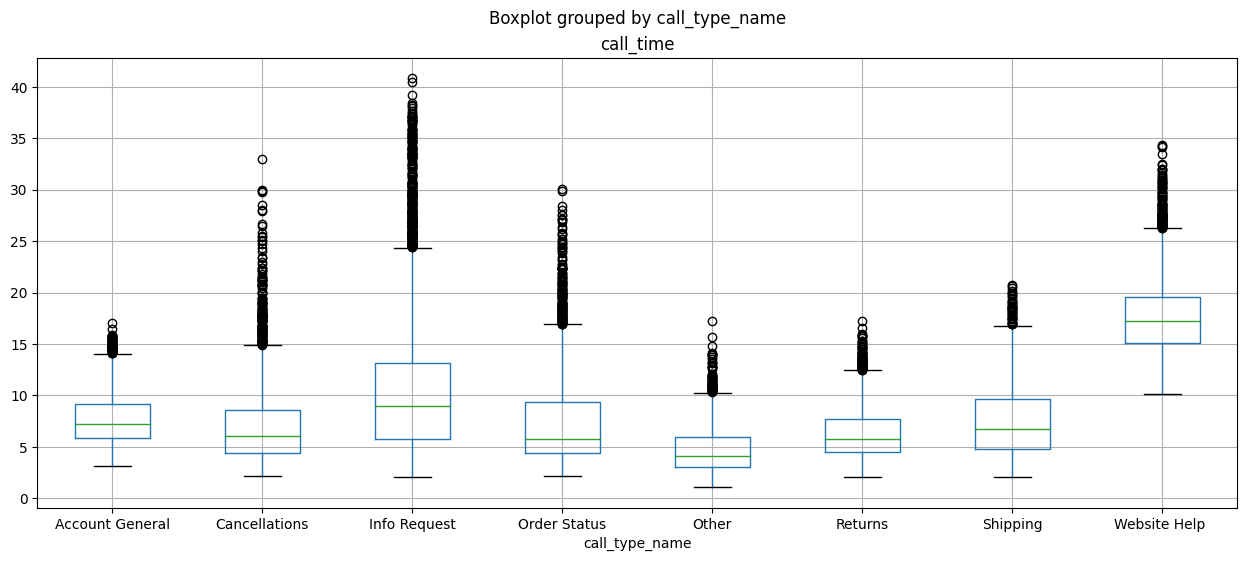

In [ ]:
calls_data.boxplot(column= 'call_time', by= 'call_type_name', figsize=(15,6))
plt.show()

De acuerdo al gráfico de cajas el tipo de llamada `Website Help` debería priorizarse primero por la empresa ya que el 75% de las llamadas duran entre 10 minutos a 20 minutos aproximadamente.

Cambiemos un poco nuestro enfoque y examinemos cómo varían los tiempos de llamada según el agente. Lo que haremos es calcular y visualizar el tiempo medio de llamada por agente. Para ello:
- Crearemos una tabla dinámica de tiempos medios de llamadas por agente.
- Utilizaremos esta tabla para crear un gráfico de barras de tiempos medios de llamadas, por agente, en orden descendente. 

In [ ]:
# mostramos los datos que tenemos
calls_data.head()

,agent_id,call_type_id,call_time,call_type_name
0,1001,1,3.96,Returns
1,1001,1,14.81,Returns
2,1001,1,4.78,Returns
3,1001,1,4.11,Returns
4,1001,1,7.11,Returns


In [ ]:
# creamos una tabla de tiempos medios de llamada
agent_mean_times = pd.pivot_table(calls_data, index='agent_id', values='call_time').sort_values(by='call_time', ascending=False) #el tiempo medio es por defecto, es decir aggfunc='mean'
agent_mean_times.head()

,call_time
agent_id,
1022,12.673765
1029,12.383767
1010,12.070799
1007,11.993103
1020,11.866799


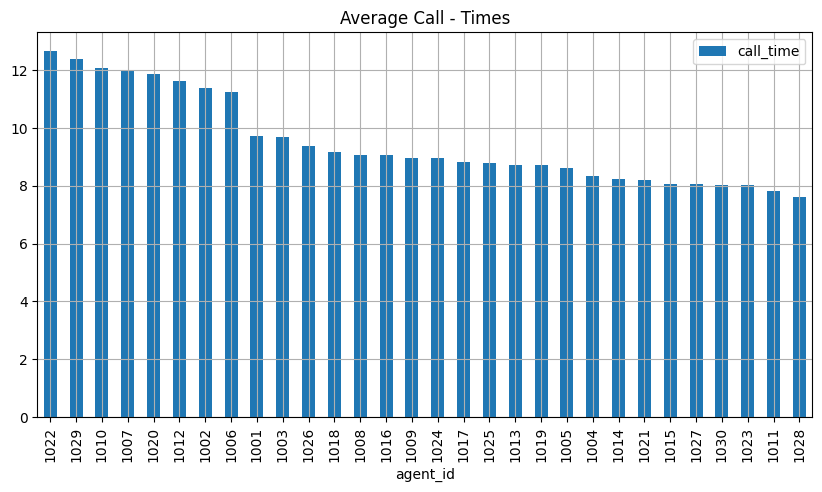

In [ ]:
# creamos un gráfico de barras de los tiempos medios de llamada
agent_mean_times.plot(kind='bar', title='Average Call - Times', grid=True, figsize=(10,5))
plt.show()

Observamos del gráfico que claramente existe una diferencia entre los agentes con medias inferiores a 10 minutos y aquellos con medias superiores a 10 minutos. Vamos a identificar el origen de esta diferencia dividiendo a estos agentes en dos grupos y comparando sus tiempos de llamada.

Primero, haremos una lista de los agentes con un desempeño entre regular y bueno (aquellos con promedios menores a 10). Para ello:
1. Segmentaremos la tabla de tiempos medios de llamada para encontrar filas donde la media sea menor que 10. Guardamos los índices de estas filas en la lista ``average_agents``.
2. Muestraremos la lista y compararemos los valores con el gráfico de barras anterior.

In [ ]:
#obtenemos los agentes con tiempos de llamada menor a 10 minutos. Usamos index para extraer solamente los agentes

# Una forma de hacerlo:
#average_agents = agent_mean_times[agent_mean_times['call_time'] < 10].index


#Otra forma de hacerlo usando query:
average_agents = agent_mean_times.query('call_time < 10').index
average_agents

Int64Index([1001, 1003, 1026, 1018, 1008, 1016, 1009, 1024, 1017, 1025, 1013,
            1019, 1005, 1004, 1014, 1021, 1015, 1027, 1030, 1023, 1011, 1028],
           dtype='int64', name='agent_id')

Ahora podemos usar esta lista para marcar los agentes con malos resultados.

Vamos a crear una nueva columna que marque a los agentes con tiempos medios de llamadas superiores a 10. Haremos lo siguiente:
1. Crearemos una nueva columna llamada ``agent_flagged`` y la estableceremos en ``'No'``.
2. Cambiaremos ``agent_flagged`` a ``'Yes'`` en las filas donde el ID del agente no se encuentra en ``average_agents``.
3. Imprimiremos los recuentos de valores de ``agent_flagged`` para verificar el cambio.

In [ ]:
# creamos la columna agent_flagged y la establecemos en 'No'
calls_data['agent_flagged'] = 'No'
calls_data.head()

,agent_id,call_type_id,call_time,call_type_name,agent_flagged
0,1001,1,3.96,Returns,No
1,1001,1,14.81,Returns,No
2,1001,1,4.78,Returns,No
3,1001,1,4.11,Returns,No
4,1001,1,7.11,Returns,No


In [ ]:
# cambiamos agent_flagged a 'Yes' en las filas donde agent_id no está en average_agents
calls_data['agent_flagged'] = calls_data['agent_flagged'].where(calls_data['agent_id'].isin(average_agents), 'Yes')
calls_data.tail()

,agent_id,call_type_id,call_time,call_type_name,agent_flagged
24546,1030,13,7.74,Other,No
24547,1030,13,11.94,Other,No
24548,1030,13,3.38,Other,No
24549,1030,13,4.41,Other,No
24550,1030,13,11.84,Other,No


In [ ]:
# imprimimos los recuentos de agent_flagged para verificar el cambio
print(calls_data['agent_flagged'].value_counts())

No     17152
Yes     7399
Name: agent_flagged, dtype: int64


Centrándonos en los agentes marcados tenemos que responder a la pregunta: ¿tienen estos agentes un bajo rendimiento en todos los tipos de llamadas o tienen un bajo rendimiento en tipos de llamadas específicos? En este último caso, la capacitación específica puede mejorar rápidamente su desempeño y reducir su tiempo medio de llamadas. Para responder a esta pregunta, compararemos la distribución de ``call_time`` por tipo de llamada, para los agentes marcados (desempeño regular a malo) y los no marcados (buen desempeño).

Para ello haremos un subconjunto de los datos agrupados por ``call_type_name`` con un bucle for, y:
* Para cada tipo de llamada, crearemos un diagramas de caja de ``call_time`` por ``agent_flagged``.
* Escribiremos el tipo de la llamada como la etiqueta del eje Y.

In [ ]:
calls_data.groupby('call_type_name')['call_time'].count()

call_type_name
Account General    3230
Cancellations      3024
Info Request       3728
Order Status       3196
Other              1753
Returns            2706
Shipping           2196
Website Help       4718
Name: call_time, dtype: int64

In [ ]:
for calltype, calldata in calls_data.groupby('call_type_name'):
    print(calldata)
    print(calltype)
    break

      agent_id  call_type_id  call_time   call_type_name agent_flagged
4902      1001             3      14.53  Account General            No
4903      1001             3      12.39  Account General            No
4904      1001             3      14.13  Account General            No
4905      1001             3      11.19  Account General            No
4906      1001             3       6.14  Account General            No
...        ...           ...        ...              ...           ...
8127      1030             3       4.69  Account General            No
8128      1030             3       8.24  Account General            No
8129      1030             3      10.30  Account General            No
8130      1030             3       7.14  Account General            No
8131      1030             3       6.90  Account General            No

[3230 rows x 5 columns]
Account General


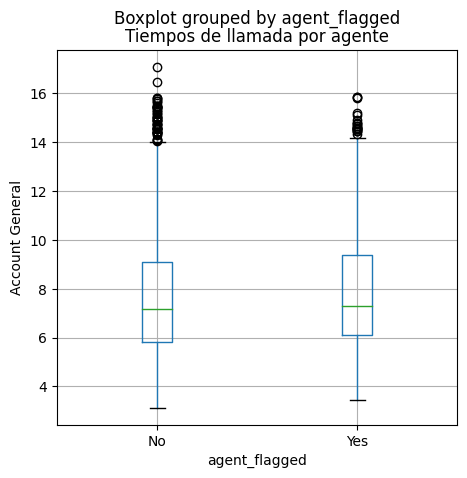

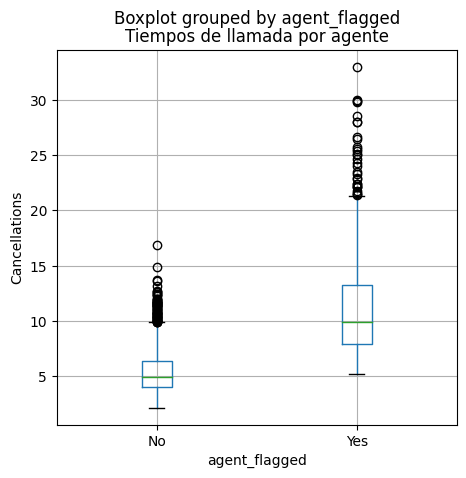

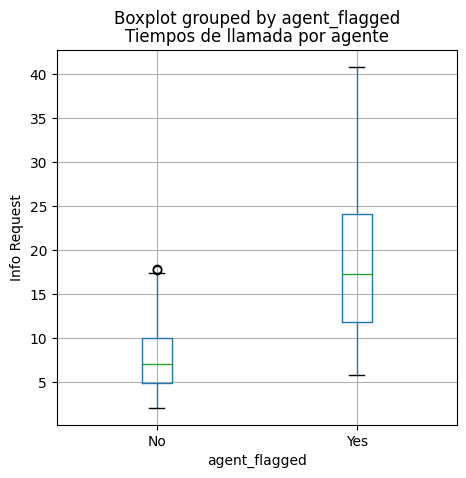

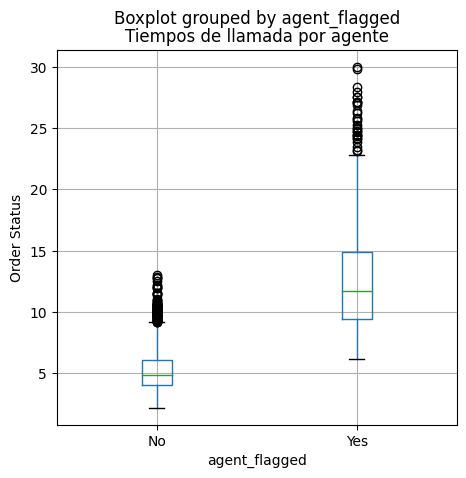

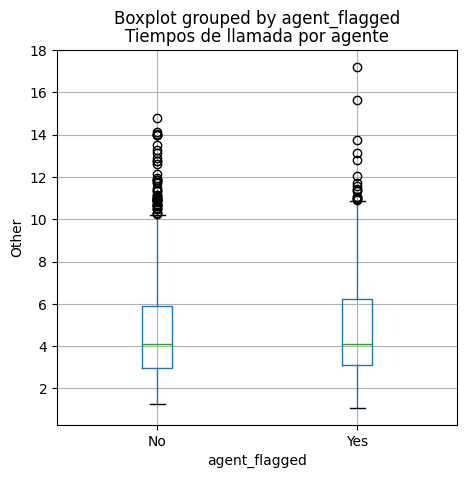

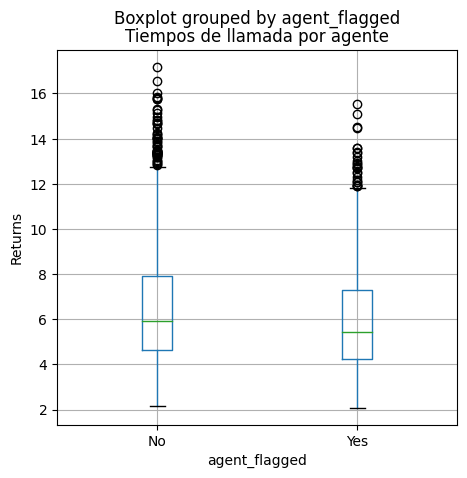

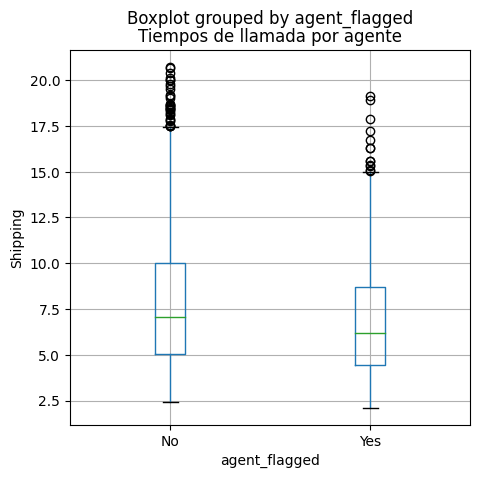

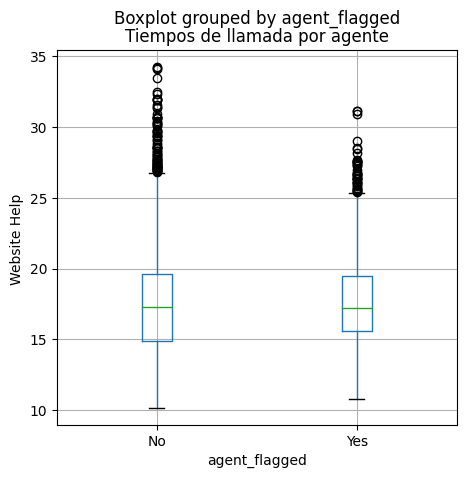

In [ ]:
#sabiendo los datos que arroja el bucle for, continuamos:
for calltype, calldata in calls_data.groupby('call_type_name'):
    calldata.boxplot(column='call_time', by='agent_flagged', figsize=(5,5))
    plt.ylabel(calltype)
    plt.title('Tiempos de llamada por agente')

De acuerdo a los gráficos de caja, observamos que hay tres tipos de llamada en que los ocho agentes tienen tiempos de llamada largo en comparación con los demás agentes. Estos tipos de llamada son `Cancellations, Info Request y Order Status`.

**``Resumen:``** La ayuda con el sitio web (Website Help) no es solo la principal razón por la que los clientes llaman, sino que también es el tipo de llamada que consume más tiempo. Mientras que todos los demás tipos tienen un tiempo medio de llamada inferior a 10 minutos, el tiempo medio de llamada para la ayuda con el sitio web es de alrededor de 17 minutos. Encontramos ocho agentes que tienen tiempos medios de llamada significativamente más largos. Una investigación más profunda reveló que estos agentes tardan más en ayudar a los clientes con las cancelaciones, las solicitudes de información y el estado de los pedidos.

**``Recomendación:``** Para hacer que el centro de llamadas sea más eficiente y preparar mejor a los agentes actuales para manejar la afluencia reciente de llamadas, los managers tienen que considerar la posibilidad de realizar modificaciones en el sitio web. Identificar qué está causando la gran cantidad de llamadas de los clientes y ajustar el sitio puede reducir la cantidad de llamadas entrantes. Medir el conocimiento de los agentes sobre el sitio web y el acceso al sitio web también podría reducir el tiempo medio de llamada en esta categoría. Se recomienda que los agentes 1022, 1029, 1010, 1007, 1020, 1012, 1002 y 1006 reciban capacitación adicional sobre cómo ayudar a los clientes con las cancelaciones, las solicitudes de información y el estado de pedidos.